# MIP Search App

Search facility for Museums in the Pandemic project. 
Birkbeck, University of London and King's College London.

Author & maintainer: andrea.ballatore [at] kcl.ac.uk

## Setup
Run this cell only once. It will take a couple of minutes. If the page stops working, reload it and run this cell again.

In [ ]:
print("Downloading source code...")
!wget -q https://www.dropbox.com/s/at7z91d2lidordi/search_utils.py?dl=1 -O search_utils.py
!wget -q https://www.dropbox.com/s/7jbbewmgdvyh3wa/museums_wattributes-2020-02-23.tsv?dl=1 -O museums_wattributes-2020-02-23.tsv
print("Downloading DB...")
!wget -q https://www.dropbox.com/s/nnaujcnzdp5y8ua/mip_corpus_search.db.zip?dl=1  -O mip_corpus_search.db.zip
!unzip -o mip_corpus_search.db.zip -d /content/
%run search_utils.py

Archive:  mip_corpus_search.db.zip
  inflating: /content/mip_corpus_search.db  

## Search

Syntax: * means 'any character'

In [105]:
#@title Search corpus { display-mode: "form" }
%run search_utils.py
search_string = "caf\xE9" #@param {type:"string"}
case_sensitive = False #@param {type:"boolean"}
search_websites = False
search_website_sentences = True #@param {type:"boolean"}
search_facebook = False #@param {type:"boolean"}
search_twitter = False #@param {type:"boolean"}
begin_date = "2020-11-12" #@param {type:"date"}
end_date = "2021-11-13" #@param {type:"date"}
max_results =  50#@param {type:"integer"}
context_window =  10#@param {type:"integer"}

res_df = run_search(search_string, case_sensitive,
           search_facebook, search_twitter, search_websites, 
           search_website_sentences, begin_date, end_date)
if len(res_df) > 0:
  results_html, results_page_df = generate_html_matches(res_df, search_string, 
    case_sensitive, context_window, max_results)
  display(HTML(results_html))
#res_df

ok
Date range: 2020-11-12 to 2021-11-13
WEBSITES: 93 matches found. N sessions: 2. Unique museums: 43
search_regex: '(?i)\bcafé\b'


res,museum_id,before,match,after,msg_time
87,mm.wiki.347,"Museum, the Royal Naval Patrol Service Museum and a",café,,2021-09-14
82,mm.wiki.256,and they had a baker’s shop with a small,café,and sweet shop and a grocer’s shop just opposite,2021-09-14
90,mm.musa.310,Beaney,Café,Accessibility Kids in Museum,2021-09-14
91,mm.musa.310,Beaney,Café,,2021-09-14
88,mm.musa.220,Pittville Pump Room Heritage,Café,,2021-09-14
79,mm.domus.SE214,Beaney,Café,Accessibility Kids in Museum,2021-09-14
80,mm.domus.SE214,Beaney,Café,,2021-09-14
81,mm.aim.1047,"building, a 25,000 square foot extension, new shop and",café,,2021-09-14
92,mm.aim.1040,A Room,Café,& Caterin,2021-09-14
93,mm.aim.1040,well-stocked gift shop selling books and souvenirs and a,café,on site,2021-09-14


<Figure size 432x288 with 0 Axes>

# Analyse search results

Run this cell to get an analysis of the composition of search results generated above in terms of museum attributes (governance, size, etc).

ok
Search: "café" • Date range: 2020-11-12 to 2021-11-13 • 
N results: 93 • N unique museums: 43


,platform,n_results,museum_id
0,website_sentences,93,43


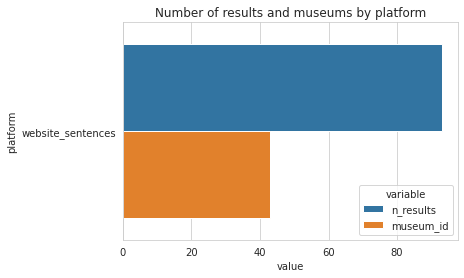

museum (17) shop (14) castle (12) room (9) beaney (8) new (6) gift (6) 
local (5) history (5) park (5) gallery (4) two (4) miles (4) small (4) 
information (4) doors (4) art (4) hoyles (4) tours (4) cornet (4) 

shop (11) museum (9) kids (4) visit (4) access (4) corporate (4) serving (4) 
delicious (4) accessibility (4) home (3) garden (3) office (3) centre (3) food (3) 
bar (3) th (2) park (2) wheelchair (2) event (2) grocer (2) 



,msg_time,size,session_id
0,2021-04-04,77,2021-04-04
1,2021-09-14,16,2021-09-14


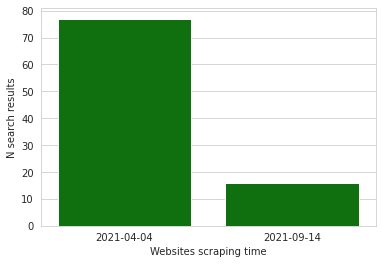

Unique museum results: 43


,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
0,Independent:Not for profit,16,37.2,1534,1.0,45.9,-8.7
1,Government:Local Authority,14,32.6,718,1.9,21.5,11.1
2,Independent:Private,5,11.6,472,1.1,14.1,-2.5
3,Independent:Unknown,3,7.0,113,2.7,3.4,3.6
4,Government:National,2,4.7,69,2.9,2.1,2.6
5,Independent:English Heritage,1,2.3,52,1.9,1.6,0.7
6,University,1,2.3,92,1.1,2.8,-0.5
7,Unknown,1,2.3,55,1.8,1.6,0.7


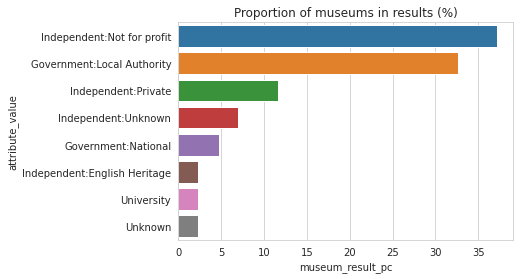

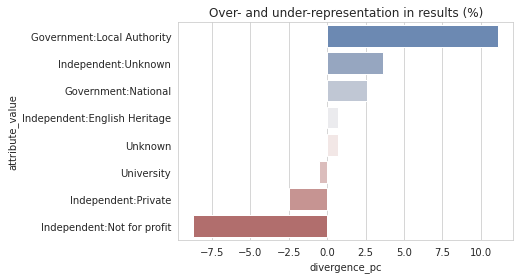

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
8,East of England,6,14.0,333,1.8,10.0,4.0
9,North West,6,14.0,247,2.4,7.4,6.6
10,South East,6,14.0,476,1.3,14.2,-0.2
11,Scotland,5,11.6,494,1.0,14.8,-3.2
12,South West,5,11.6,422,1.2,12.6,-1.0
13,East Midlands,3,7.0,229,1.3,6.9,0.1
14,Wales,3,7.0,207,1.4,6.2,0.8
15,Yorkshire and The Humber,3,7.0,229,1.3,6.9,0.1
16,Northern Ireland,2,4.7,94,2.1,2.8,1.9
17,West Midlands,2,4.7,228,0.9,6.8,-2.1


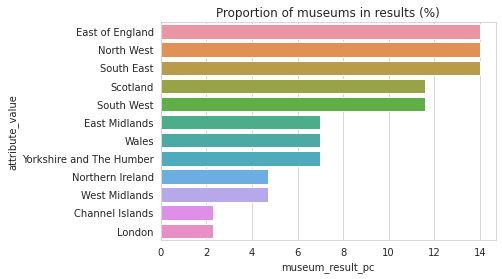

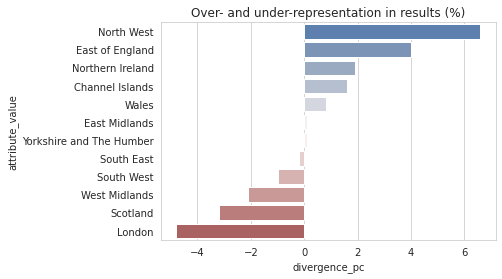

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
20,small,18,41.9,1825,1.0,54.6,-12.7
21,medium,14,32.6,865,1.6,25.9,6.7
22,large,8,18.6,498,1.6,14.9,3.7
23,unknown,3,7.0,141,2.1,4.2,2.8


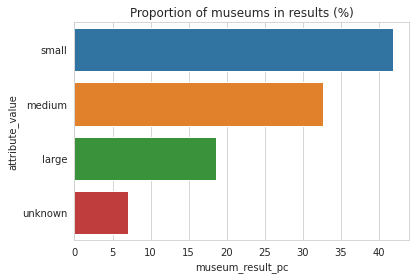

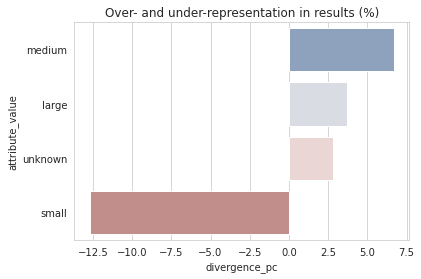

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
24,Local Histories,12,27.9,764,1.6,22.9,5.0
25,War and conflict,8,18.6,333,2.4,10.0,8.6
26,Industry and manufacture,5,11.6,151,3.3,4.5,7.1
27,Arts,4,9.3,247,1.6,7.4,1.9
28,Buildings,3,7.0,553,0.5,16.6,-9.6
29,Mixed,3,7.0,166,1.8,5.0,2.0
30,Transport,3,7.0,224,1.3,6.7,0.3
31,Leisure and sport,2,4.7,87,2.3,2.6,2.1
32,Belief and identity,1,2.3,96,1.0,2.9,-0.6
33,Personality,1,2.3,176,0.6,5.3,-3.0


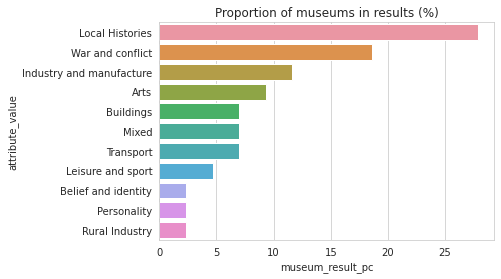

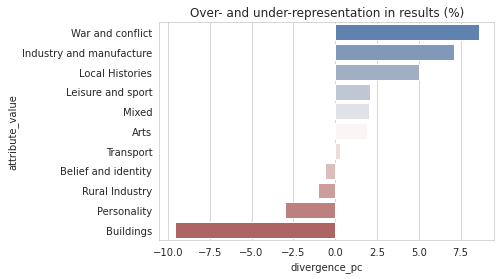

In [106]:
%run search_utils.py
#@title Analysis options { display-mode: "form" }
token_context_size =  10#@param {type:"integer"}
list_before_after_words_limit =  20#@param {type:"integer"}
assert len(res_df) > 0
res_attr_df = an_results(res_df, search_string, case_sensitive, token_context_size, list_before_after_words_limit)
#res_attr_df

### Download results as Excel or CSV

If save as Excel fails, try CSV.

In [107]:
# click here to download the complete search results as EXCEL
fn = 'search_results_{}.xlsx'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
# click here to download the complete search results as CSV
fn = 'search_results_{}.csv'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_csv(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
# click here to download the attribute analysis of results
fn = 'search_results_attributes_{}.xlsx'.format(get_now_string())
df = res_attr_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Backup application

This is for the platform's developer.

In [96]:
files.download('search_utils.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>